In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
x_min = -400.0
x_max = 400.0
nx = 4096

def potential(x):
    V = -0.5 * (x*x + 0.25)**(-.5)
    return V





ic| message: 'Dimension set to 1'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000
ic| hasattr(self, 'gs'): False
ic| 'computing ground state ... '
ic| 'not using guess for ground state ... '


Initial guess: resid = 38.78065941167145, E = 42.81285681697962
Iteration 0, delta = 0.9987371942595388, resid = 3.2415282827391367, E = 0.877803446865045
Iteration 1, delta = 0.33185720309209993, resid = 0.411927220603148, E = 0.18941597959064133
Iteration 2, delta = 0.24328616231268255, resid = 0.2608551004177733, E = 0.04826843532988739
Iteration 3, delta = 0.31870941080040277, resid = 0.2904663731588149, E = -0.12370626225163797
Iteration 4, delta = 0.3678018679762592, resid = 0.25847600139511273, E = -0.33340627186408744
Iteration 5, delta = 0.27673793305376443, resid = 0.15644344845579877, E = -0.4510538386670119
Iteration 6, delta = 0.154611561284442, resid = 0.07990539860593886, E = -0.4878305811294439
Iteration 7, delta = 0.0776654281046154, resid = 0.039147960012957714, E = -0.49708185734076055
Iteration 8, delta = 0.038111348458044, resid = 0.019092758938924256, E = -0.49929984742114375
Iteration 9, delta = 0.018681900790899493, resid = 0.009345337303509853, E = -0.499830650

ic| hasattr(self, 'gs'): True


Iteration 22, delta = 2.4675785450360365e-06, resid = 1.233769137132e-06, E = -0.5000000400093558
Iteration 23, delta = 1.270609215160283e-06, resid = 6.352727903211785e-07, E = -0.5000000400117373
Iteration 24, delta = 6.564092117230822e-07, resid = 3.281851664356071e-07, E = -0.5000000400123751
Iteration 25, delta = 3.4023187246204275e-07, resid = 1.7010814417882988e-07, E = -0.5000000400125395
Iteration 26, delta = 1.7694078034340774e-07, resid = 8.84685722577646e-08, E = -0.5000000400125743
Iteration 27, delta = 9.232635897156875e-08, resid = 4.61679311933908e-08, E = -0.5000000400125838
Iteration 28, delta = 4.833785497231054e-08, resid = 2.4177806391907968e-08, E = -0.5000000400125867
Iteration 29, delta = 2.539909969874163e-08, resid = 1.270385393630953e-08, E = -0.5000000400125879
Iteration 30, delta = 1.3372794422850933e-08, resid = 6.716542843165414e-09, E = -0.500000040012588
Iteration 31, delta = 7.05529477140387e-09, resid = 3.5791949857646347e-09, E = -0.5000000400125878


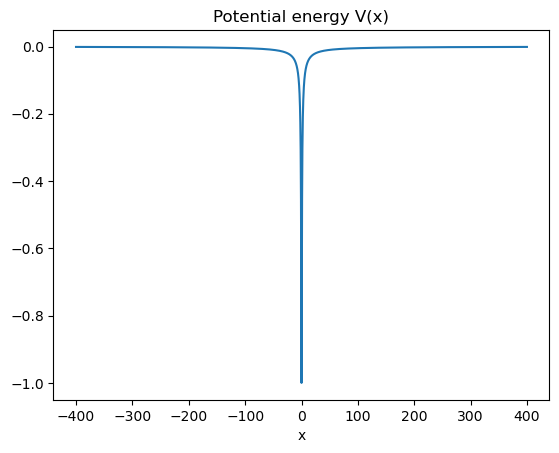

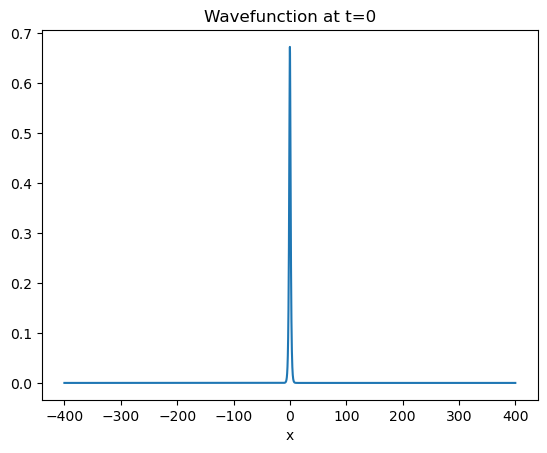

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
#sim.set_ground_state_grid(-50,50,512)
sim.set_time_parameters(0.0, 150.0, 15000)
#sim.ground_state_guess =  sim.x * np.exp(-sim.x**2/2)
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.1)
sim.set_laser_pulse(laser)

sim.prepare()


plt.figure()
plt.plot(sim.x,potential(sim.x))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.x,sim.psi.real)
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()


In [4]:
sim.prepare()
anim = Animator1d(sim)

anim.set_style(DarkTheme1d())


anim.set_interval(20)
anim.set_framesize(1024, 768)
anim.xlim = [-200,200]

anim.init_figure()


anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie("atom_1d.mp4")
anim.clean_frames()


ic| hasattr(self, 'gs'): True
ic| 'reusing ground state from previous computation'
ic| self.format: './frames/frame%05d.png'
ic| 'I am in init_figure'
ic| 'show axis'
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

ic| len(self.frame_list): 751
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvb

In [5]:
help(LaserPulse)

Help on class LaserPulse in module fft_tdse.simulator:

class LaserPulse(builtins.object)
 |  LaserPulse(omega, t0, T, E0)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, t)
 |      The laser pulse.
 |  
 |  __init__(self, omega, t0, T, E0)
 |      Initialize a laser pulse.
 |      
 |      The laser pulse model is
 |      $$ E(t) = E_0 \sin^2(\pi(t-t_0)/T) \cos(\omega(t-t_0 - T/2)) $$
 |      
 |      Args:
 |          omega (float): The frequency of the laser pulse.
 |          t0 (float): The time at which the pulse starts.
 |          T (float): The duration of the pulse.
 |          E0 (float): The amplitude of the pulse.
 |          
 |      Returns:
 |          None
 |  
 |  envelope(self, t)
 |      The envelope function of the laser pulse.
 |      
 |      Args:
 |          t (float): The time.
 |      Returns: 
 |          float: The envelope function.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 | 